<a href="https://colab.research.google.com/github/KORALLLL/MTUCI_EMNIST/blob/Gleb/gleb_notebook/Gleb_notebook_week4_5_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
  <tr>
    <th>layer</th>
    <th>layer type2</th>
    <th>feature maps</th>
    <th>size</th>
    <th>kernel size</th>
    <th>stride</th>
    <th>padding</th>
    <th>activation</th>
  </tr>
  <tr>
    <th>input</th>
    <th>image</th>
    <th>1</th>
    <th>28*28</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
    <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>3</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  </tr>
    <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>6</th>
    <th>26*26</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>ReLU6</th>
  </tr>
    <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>6</th>
    <th>26*26</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  </tr>
    <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>9</th>
    <th>24*24</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>ReLU6</th>
  </tr>
  </tr>
    <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>9</th>
    <th>24*24</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>2</th>
    <th>average pooling</th>
    <th>9</th>
    <th>12*12</th>
    <th>2*2</th>
    <th>2</th>
    <th>2</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>12</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>12</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>4</th>
    <th>average pooling</th>
    <th>16</th>
    <th>5*5</th>
    <th>2*2</th>
    <th>2</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>5</th>
    <th>fully connected</th>
    <th>-</th>
    <th>120</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>6</th>
    <th>fully connected</th>
    <th>-</th>
    <th>84</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>output</th>
    <th>fully connected</th>
    <th>-</th>
    <th>10</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
</table>

train dataset: MNIST + EMNIST letters

test dataset: dataset of DreamTeam

training sample size: 36960

testing sample size: 16784

loss finction: Cross Entropy Loss

optimizer: adam

learning rate: 0.001

batch size: 560

epoch number: 100

#Preparing Stage

In [2]:
import torch
import torchvision.datasets
import torchvision.transforms as transforms
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as bar
import pickle
import numpy as np
import scipy.stats as stats
import plotly.graph_objs as go


In [3]:
!git clone https://github.com/KORALLLL/MTUCI_EMNIST.git

Cloning into 'MTUCI_EMNIST'...
remote: Enumerating objects: 36524, done.
remote: Counting objects: 100% (12884/12884), done.
remote: Compressing objects: 100% (12715/12715), done.
remote: Total 36524 (delta 203), reused 12805 (delta 160), pack-reused 23640
Receiving objects: 100% (36524/36524), 129.33 MiB | 33.98 MiB/s, done.
Resolving deltas: 100% (488/488), done.


In [4]:
emnist_train = torchvision.datasets.EMNIST('./', split='letters', download = True, train = True)
mnist_train = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = True)
emnist_val = torchvision.datasets.EMNIST('./', split='letters', download = True, train = False)
mnist_val = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = False)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

emnist_train_data = emnist_train.data
mnist_train_data = mnist_train.data
train_data = torch.cat([emnist_train_data[:24960], mnist_train_data[:12000]], dim=0).float().unsqueeze(1).to(device) / 255

emnist_val_data = emnist_val.data
mnist_val_data = mnist_val.data
val_data = torch.cat([emnist_val_data, mnist_val_data], dim=0).float().unsqueeze(1).to(device) / 255

temp_emnist_train_labels = emnist_train.targets[:24960]
emnist_train_labels = []

temp_emnist_val_labels = emnist_val.targets
emnist_val_labels = []

for i in range(len(temp_emnist_train_labels)):
  if temp_emnist_train_labels[i]==15:
    emnist_train_labels.append(torch.tensor(0))
  elif temp_emnist_train_labels[i]>15:
    emnist_train_labels.append(temp_emnist_train_labels[i]+8)
  else:
    emnist_train_labels.append(temp_emnist_train_labels[i]+9)

for i in range(len(temp_emnist_val_labels)):
  if temp_emnist_val_labels[i]==15:
    emnist_val_labels.append(torch.tensor(0))
  elif temp_emnist_val_labels[i]>15:
    emnist_val_labels.append(temp_emnist_val_labels[i] + 8)
  else:
    emnist_val_labels.append(temp_emnist_val_labels[i]+9)

mnist_train_labels = mnist_train.targets
train_labels = torch.cat([torch.stack(emnist_train_labels[:24960]), mnist_train_labels[:12000]], dim=0).to(device)

mnist_val_labels = mnist_val.targets
val_labels = torch.cat([torch.stack(emnist_val_labels), mnist_val_labels], dim=0).to(device)


file = open('MTUCI_EMNIST/dataset.pkl', 'rb')
test_dataset = pickle.load(file)
file.close()

test_data = test_dataset['data'].numpy()
test_data = np.flip(test_data, axis = 3)
test_data = np.rot90(test_data, k=1, axes=(2,3))
test_data = 1 - test_data
test_data = torch.from_numpy(test_data).float().to(device)
test_labels = test_dataset['targets'].to(device)

100%|██████████| 561753746/561753746 [00:06<00:00, 88936467.03it/s] 


Extracting ./EMNIST/raw/gzip.zip to ./EMNIST/raw


#Lenets classes

In [5]:
class LeNet(torch.nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels = 1, out_channels = 3, kernel_size = 3, padding = 1)
    self.act1 = torch.nn.ReLU6()
    self.conv2 = torch.nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 3, padding = 0)
    self.act2 = torch.nn.ReLU6()

    self.conv3 = torch.nn.Conv2d(in_channels = 6, out_channels = 6, kernel_size = 3, padding = 1)
    self.act3 = torch.nn.ReLU6()

    self.conv4 = torch.nn.Conv2d(in_channels = 6, out_channels = 9, kernel_size = 3, padding = 0)
    self.act4 = torch.nn.ReLU6()

    self.conv5 = torch.nn.Conv2d(in_channels = 9, out_channels = 9, kernel_size = 3, padding = 1)
    self.act5 = torch.nn.ReLU6()

    self.pool1 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act6 = torch.nn.ReLU6()

    self.conv6 = torch.nn.Conv2d(in_channels = 9, out_channels = 12, kernel_size = 3, padding = 1)
    self.act7 = torch.nn.ReLU6()
    self.conv7 = torch.nn.Conv2d(in_channels = 12, out_channels = 16, kernel_size = 3, padding = 0)
    self.act8 = torch.nn.ReLU6()

    self.conv8 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.act9 = torch.nn.ReLU6()

    self.conv9 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.act10 = torch.nn.ReLU6()

    self.pool2 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act11 = torch.nn.ReLU6()
    self.fc1 = torch.nn.Linear(400, 120)
    self.act12 = torch.nn.ReLU6()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act13 = torch.nn.ReLU6()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.conv2(x)
    x = self.act2(x)
    x = self.conv3(x)
    x = self.act3(x)

    x = self.conv4(x)
    x = self.act4(x)
    x = self.conv5(x)
    x = self.act5(x)

    x = self.pool1(x)
    x = self.act6(x)

    x = self.conv6(x)
    x = self.act7(x)
    x = self.conv7(x)
    x = self.act8(x)

    x = self.conv8(x)
    x = self.act9(x)
    x = self.conv9(x)
    x = self.act10(x)

    x = self.pool2(x)
    x = self.act11(x)

    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
    x = self.fc1(x)
    x = self.act12(x)
    x = self.fc2(x)
    x = self.act13(x)
    x = self.fc3(x)

    return x

In [6]:
class LeNetBatch(torch.nn.Module):
  def __init__(self):
    super(LeNetBatch, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels = 1, out_channels = 3, kernel_size = 3, padding = 1)
    self.batn1 = torch.nn.BatchNorm2d(3)
    self.act1 = torch.nn.ReLU6()

    self.conv2 = torch.nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 3, padding = 0)
    self.batn2 = torch.nn.BatchNorm2d(6)
    self.act2 = torch.nn.ReLU6()

    self.conv3 = torch.nn.Conv2d(in_channels = 6, out_channels = 6, kernel_size = 3, padding = 1)
    self.batn3 = torch.nn.BatchNorm2d(6)
    self.act3 = torch.nn.ReLU6()

    self.conv4 = torch.nn.Conv2d(in_channels = 6, out_channels = 9, kernel_size = 3, padding = 0)
    self.batn4 = torch.nn.BatchNorm2d(9)
    self.act4 = torch.nn.ReLU6()

    self.conv5 = torch.nn.Conv2d(in_channels = 9, out_channels = 9, kernel_size = 3, padding = 1)
    self.batn5 = torch.nn.BatchNorm2d(9)
    self.act5 = torch.nn.ReLU6()

    self.pool1 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act6 = torch.nn.ReLU6()

    self.conv6 = torch.nn.Conv2d(in_channels = 9, out_channels = 12, kernel_size = 3, padding = 1)
    self.batn6 = torch.nn.BatchNorm2d(12)
    self.act7 = torch.nn.ReLU6()

    self.conv7 = torch.nn.Conv2d(in_channels = 12, out_channels = 16, kernel_size = 3, padding = 0)
    self.batn7 = torch.nn.BatchNorm2d(16)
    self.act8 = torch.nn.ReLU6()

    self.conv8 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.batn8 = torch.nn.BatchNorm2d(16)
    self.act9 = torch.nn.ReLU6()

    self.conv9 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.batn9 = torch.nn.BatchNorm2d(16)
    self.act10 = torch.nn.ReLU6()

    self.pool2 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act11 = torch.nn.ReLU6()
    self.fc1 = torch.nn.Linear(400, 120)
    self.act12 = torch.nn.ReLU6()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act13 = torch.nn.ReLU6()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.batn1(x)
    x = self.act1(x)

    x = self.conv2(x)
    x = self.batn2(x)
    x = self.act2(x)

    x = self.conv3(x)
    x = self.batn3(x)
    x = self.act3(x)

    x = self.conv4(x)
    x = self.batn4(x)
    x = self.act4(x)

    x = self.conv5(x)
    x = self.batn5(x)
    x = self.act5(x)

    x = self.pool1(x)
    x = self.act6(x)

    x = self.conv6(x)
    x = self.batn6(x)
    x = self.act7(x)

    x = self.conv7(x)
    x = self.batn7(x)
    x = self.act8(x)

    x = self.conv8(x)
    x = self.batn8(x)
    x = self.act9(x)

    x = self.conv9(x)
    x = self.batn9(x)
    x = self.act10(x)

    x = self.pool2(x)
    x = self.act11(x)

    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
    x = self.fc1(x)
    x = self.act12(x)
    x = self.fc2(x)
    x = self.act13(x)
    x = self.fc3(x)

    return x

In [7]:
class LeNetDropout(torch.nn.Module):
  def __init__(self, dropout_rate):
    super(LeNetDropout, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels = 1, out_channels = 3, kernel_size = 3, padding = 1)
    self.act1 = torch.nn.ReLU6()
    self.drop1 = torch.nn.Dropout(p = dropout_rate)

    self.conv2 = torch.nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 3, padding = 0)
    self.act2 = torch.nn.ReLU6()
    self.drop2 = torch.nn.Dropout(p = dropout_rate)

    self.conv3 = torch.nn.Conv2d(in_channels = 6, out_channels = 6, kernel_size = 3, padding = 1)
    self.act3 = torch.nn.ReLU6()
    self.drop3 = torch.nn.Dropout(p = dropout_rate)

    self.conv4 = torch.nn.Conv2d(in_channels = 6, out_channels = 9, kernel_size = 3, padding = 0)
    self.act4 = torch.nn.ReLU6()
    self.drop4 = torch.nn.Dropout(p = dropout_rate)

    self.conv5 = torch.nn.Conv2d(in_channels = 9, out_channels = 9, kernel_size = 3, padding = 1)
    self.act5 = torch.nn.ReLU6()
    self.drop5 = torch.nn.Dropout(p = dropout_rate)

    self.pool1 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act6 = torch.nn.ReLU6()

    self.conv6 = torch.nn.Conv2d(in_channels = 9, out_channels = 12, kernel_size = 3, padding = 1)
    self.act7 = torch.nn.ReLU6()
    self.drop6 = torch.nn.Dropout(p = dropout_rate)

    self.conv7 = torch.nn.Conv2d(in_channels = 12, out_channels = 16, kernel_size = 3, padding = 0)
    self.act8 = torch.nn.ReLU6()
    self.drop7 = torch.nn.Dropout(p = dropout_rate)

    self.conv8 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.act9 = torch.nn.ReLU6()
    self.drop8 = torch.nn.Dropout(p = dropout_rate)

    self.conv9 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.act10 = torch.nn.ReLU6()
    self.drop9 = torch.nn.Dropout(p = dropout_rate)

    self.pool2 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act11 = torch.nn.ReLU6()
    self.fc1 = torch.nn.Linear(400, 120)
    self.act12 = torch.nn.ReLU6()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act13 = torch.nn.ReLU6()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.drop1(x)

    x = self.conv2(x)
    x = self.act2(x)
    x = self.drop2(x)

    x = self.conv3(x)
    x = self.act3(x)
    x = self.drop3(x)

    x = self.conv4(x)
    x = self.act4(x)
    x = self.drop4(x)

    x = self.conv5(x)
    x = self.act5(x)
    x = self.drop5(x)

    x = self.pool1(x)
    x = self.act6(x)

    x = self.conv6(x)
    x = self.act7(x)
    x = self.drop6(x)

    x = self.conv7(x)
    x = self.act8(x)
    x = self.drop7(x)

    x = self.conv8(x)
    x = self.act9(x)
    x = self.drop8(x)

    x = self.conv9(x)
    x = self.act10(x)
    x = self.drop9(x)

    x = self.pool2(x)
    x = self.act11(x)

    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
    x = self.fc1(x)
    x = self.act12(x)
    x = self.fc2(x)
    x = self.act13(x)
    x = self.fc3(x)

    return x

In [8]:
class LeNetBatchAndDropout(torch.nn.Module):
  def __init__(self, dropout_rate):
    super(LeNetBatchAndDropout, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels = 1, out_channels = 3, kernel_size = 3, padding = 1)
    self.batn1 = torch.nn.BatchNorm2d(3)
    self.act1 = torch.nn.ReLU6()
    self.drop1 = torch.nn.Dropout(p = dropout_rate)

    self.conv2 = torch.nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 3, padding = 0)
    self.batn2 = torch.nn.BatchNorm2d(6)
    self.act2 = torch.nn.ReLU6()
    self.drop2 = torch.nn.Dropout(p = dropout_rate)

    self.conv3 = torch.nn.Conv2d(in_channels = 6, out_channels = 6, kernel_size = 3, padding = 1)
    self.batn3 = torch.nn.BatchNorm2d(6)
    self.act3 = torch.nn.ReLU6()
    self.drop3 = torch.nn.Dropout(p = dropout_rate)

    self.conv4 = torch.nn.Conv2d(in_channels = 6, out_channels = 9, kernel_size = 3, padding = 0)
    self.batn4 = torch.nn.BatchNorm2d(9)
    self.act4 = torch.nn.ReLU6()
    self.drop4 = torch.nn.Dropout(p = dropout_rate)

    self.conv5 = torch.nn.Conv2d(in_channels = 9, out_channels = 9, kernel_size = 3, padding = 1)
    self.batn5 = torch.nn.BatchNorm2d(9)
    self.act5 = torch.nn.ReLU6()
    self.drop5 = torch.nn.Dropout(p = dropout_rate)

    self.pool1 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act6 = torch.nn.ReLU6()

    self.conv6 = torch.nn.Conv2d(in_channels = 9, out_channels = 12, kernel_size = 3, padding = 1)
    self.batn6 = torch.nn.BatchNorm2d(12)
    self.act7 = torch.nn.ReLU6()
    self.drop6 = torch.nn.Dropout(p = dropout_rate)

    self.conv7 = torch.nn.Conv2d(in_channels = 12, out_channels = 16, kernel_size = 3, padding = 0)
    self.batn7 = torch.nn.BatchNorm2d(16)
    self.act8 = torch.nn.ReLU6()
    self.drop7 = torch.nn.Dropout(p = dropout_rate)

    self.conv8 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.batn8 = torch.nn.BatchNorm2d(16)
    self.act9 = torch.nn.ReLU6()
    self.drop8 = torch.nn.Dropout(p = dropout_rate)

    self.conv9 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.batn9 = torch.nn.BatchNorm2d(16)
    self.act10 = torch.nn.ReLU6()
    self.drop9 = torch.nn.Dropout(p = dropout_rate)

    self.pool2 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act11 = torch.nn.ReLU6()
    self.fc1 = torch.nn.Linear(400, 120)
    self.act12 = torch.nn.ReLU6()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act13 = torch.nn.ReLU6()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.batn1(x)
    x = self.act1(x)
    x = self.drop1(x)

    x = self.conv2(x)
    x = self.batn2(x)
    x = self.act2(x)
    x = self.drop2(x)

    x = self.conv3(x)
    x = self.batn3(x)
    x = self.act3(x)
    x = self.drop3(x)

    x = self.conv4(x)
    x = self.batn4(x)
    x = self.act4(x)
    x = self.drop4(x)

    x = self.conv5(x)
    x = self.batn5(x)
    x = self.act5(x)
    x = self.drop5(x)

    x = self.pool1(x)
    x = self.act6(x)

    x = self.conv6(x)
    x = self.batn6(x)
    x = self.act7(x)
    x = self.drop6(x)

    x = self.conv7(x)
    x = self.batn7(x)
    x = self.act8(x)
    x = self.drop7(x)

    x = self.conv8(x)
    x = self.batn8(x)
    x = self.act9(x)
    x = self.drop8(x)

    x = self.conv9(x)
    x = self.batn9(x)
    x = self.act10(x)
    x = self.drop9(x)

    x = self.pool2(x)
    x = self.act11(x)

    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
    x = self.fc1(x)
    x = self.act12(x)
    x = self.fc2(x)
    x = self.act13(x)
    x = self.fc3(x)

    return x

#Training each of Lenets on 250 epoches. Preparing exploration

#LeNet 61 epoches

In [ ]:
lenet = LeNet().to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)
test_accuracy = []
batch_size = 560

for epoch in bar(range(250), desc = 'learning'):
  indexs = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()
    batch_index = indexs[start_index: start_index + batch_size]
    labels_batch = train_labels[batch_index].to(device)

    images_batch = train_data[batch_index].to(device)
    prediction = lenet.forward(images_batch)
    loss_value = loss(prediction, labels_batch)
    loss_value.backward()
    optimizer.step()

  with torch.no_grad():
    prediction_test = lenet.forward(test_data)
    test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
    test_accuracy.append(test_acc)

<ipython-input-49-53a307f8080f>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/250 [00:00<?, ?it/s]

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(250)], y = test_accuracy, mode = 'lines+markers'))
fig.update_layout(title = "LeNet accuracy histore", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

#LeNetBatch 44 epoches

In [ ]:
lenet = LeNetBatch().to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)
test_accuracy = []
batch_size = 560

for epoch in bar(range(250), desc = 'learning'):
  indexs = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()
    batch_index = indexs[start_index: start_index + batch_size]
    labels_batch = train_labels[batch_index].to(device)

    images_batch = train_data[batch_index].to(device)
    prediction = lenet.forward(images_batch)
    loss_value = loss(prediction, labels_batch)
    loss_value.backward()
    optimizer.step()

  with torch.no_grad():
    prediction_test = lenet.forward(test_data)
    test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
    test_accuracy.append(test_acc)

<ipython-input-52-6d9b08aaf604>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/250 [00:00<?, ?it/s]

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(250)], y = test_accuracy, mode = 'lines+markers'))
fig.update_layout(title = "LeNetBatch accuracy histore", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

#LeNetDropout [210, 75, 66, 63, 80, 67]

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)
batch_size = 560
dropouts = [0.5,0.1, 0.05, 0.01, 0.005, 0.001]
test_accuracy_dropouts = []
for dp in dropouts:
  lenet = LeNetDropout(dp).to(device)
  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)
  test_accuracy = []
  for epoch in bar(range(250), desc = 'learning'):
    indexs = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()
      batch_index = indexs[start_index: start_index + batch_size]
      labels_batch = train_labels[batch_index].to(device)

      images_batch = train_data[batch_index].to(device)
      prediction = lenet.forward(images_batch)
      loss_value = loss(prediction, labels_batch)
      loss_value.backward()
      optimizer.step()

    with torch.no_grad():
      prediction_test = lenet.forward(test_data)
      test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
      test_accuracy.append(test_acc)

  test_accuracy_dropouts.append(test_accuracy)

<ipython-input-19-68141a9cc958>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(250), desc = 'learning'):


learning:   0%|          | 0/250 [00:00<?, ?it/s]

learning:   0%|          | 0/250 [00:00<?, ?it/s]

learning:   0%|          | 0/250 [00:00<?, ?it/s]

learning:   0%|          | 0/250 [00:00<?, ?it/s]

learning:   0%|          | 0/250 [00:00<?, ?it/s]

learning:   0%|          | 0/250 [00:00<?, ?it/s]

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(250)], y = test_accuracy_dropouts[0], mode = 'lines+markers'))
fig.update_layout(title = "LeNetBatch Accuracy History for 0.5", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(250)], y = test_accuracy_dropouts[1], mode = 'lines+markers'))
fig.update_layout(title = "LeNetBatch Accuracy History for 0.1", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(250)], y = test_accuracy_dropouts[2], mode = 'lines+markers'))
fig.update_layout(title = "LeNetBatch Accuracy History for 0.05", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(250)], y = test_accuracy_dropouts[3], mode = 'lines+markers'))
fig.update_layout(title = "LeNetBatch Accuracy History for 0.01", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(250)], y = test_accuracy_dropouts[4], mode = 'lines+markers'))
fig.update_layout(title = "LeNetBatch Accuracy History for 0.005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(250)], y = test_accuracy_dropouts[5], mode = 'lines+markers'))
fig.update_layout(title = "LeNetBatch Accuracy History for 0.001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

#LeNetBatchAndDropout [176, 58, 96, 40, 40, 40]

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)
batch_size = 560
dropouts = [0.5,0.1, 0.05, 0.01, 0.005, 0.001]
test_accuracy_dropouts1 = []
for dp in dropouts:
  lenet = LeNetBatchAndDropout(dp).to(device)
  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)
  test_accuracy = []
  for epoch in bar(range(250), desc = 'learning'):
    indexs = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()
      batch_index = indexs[start_index: start_index + batch_size]
      labels_batch = train_labels[batch_index].to(device)

      images_batch = train_data[batch_index].to(device)
      prediction = lenet.forward(images_batch)
      loss_value = loss(prediction, labels_batch)
      loss_value.backward()
      optimizer.step()

    with torch.no_grad():
      prediction_test = lenet.forward(test_data)
      test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
      test_accuracy.append(test_acc)

  test_accuracy_dropouts1.append(test_accuracy)

<ipython-input-31-32e010416204>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(250), desc = 'learning'):


learning:   0%|          | 0/250 [00:00<?, ?it/s]

learning:   0%|          | 0/250 [00:00<?, ?it/s]

learning:   0%|          | 0/250 [00:00<?, ?it/s]

learning:   0%|          | 0/250 [00:00<?, ?it/s]

learning:   0%|          | 0/250 [00:00<?, ?it/s]

learning:   0%|          | 0/250 [00:00<?, ?it/s]

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(250)], y = test_accuracy_dropouts1[0], mode = 'lines+markers'))
fig.update_layout(title = "LeNetBatchAndDropout Accuracy History for 0.5", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(250)], y = test_accuracy_dropouts1[1], mode = 'lines+markers'))
fig.update_layout(title = "LeNetBatchAndDropout Accuracy History for 0.1", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(250)], y = test_accuracy_dropouts1[2], mode = 'lines+markers'))
fig.update_layout(title = "LeNetBatchAndDropout Accuracy History for 0.05", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(250)], y = test_accuracy_dropouts1[3], mode = 'lines+markers'))
fig.update_layout(title = "LeNetBatchAndDropout Accuracy History for 0.01", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(250)], y = test_accuracy_dropouts1[4], mode = 'lines+markers'))
fig.update_layout(title = "LeNetBatchAndDropout Accuracy History for 0.005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(250)], y = test_accuracy_dropouts1[5], mode = 'lines+markers'))
fig.update_layout(title = "LeNetBatchAndDropout Accuracy History for 0.001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

#Exploration

#LeNet and LeNetBatch Learned

In [ ]:
batch_size = 560
lenets = [LeNet, LeNetBatch]
epoch_number = [61, 44]
epoch_accuracy = []
for lnt in bar(range(2), desc = "Lenets"):
  for experemets in bar(range(20), desc = "experiments"):
    lenet = lenets[lnt]().to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)
    max_accuracy = 0.
    for epoch in bar(range(epoch_number[lnt]), desc = 'learning'):
      indexs = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()
        batch_index = indexs[start_index: start_index + batch_size]
        labels_batch = train_labels[batch_index].to(device)

        images_batch = train_data[batch_index].to(device)
        prediction = lenet.forward(images_batch)
        loss_value = loss(prediction, labels_batch)
        loss_value.backward()
        optimizer.step()

      with torch.no_grad():
        prediction_test = lenet.forward(test_data)
        test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
        test_acc = str(test_acc).replace("tensor(", '')
        test_acc = test_acc.replace(')', '')
        test_acc = float(test_acc)
        max_accuracy = max(max_accuracy, test_acc)

    print(max_accuracy)
    epoch_accuracy.append(max_accuracy)

  print(epoch_accuracy)



<ipython-input-9-2cbfac5d0f27>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for lnt in bar(range(2), desc = "Lenets"):


Lenets:   0%|          | 0/2 [00:00<?, ?it/s]

<ipython-input-9-2cbfac5d0f27>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experemets in bar(range(20), desc = "experiments"):


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-9-2cbfac5d0f27>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(epoch_number[lnt]), desc = 'learning'):


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.7777


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.6804


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.7515


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.6866


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.7405


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.7535


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.7621


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.0499


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.7474


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.7503


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.7334


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.7571


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.7636


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.7159


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.6527


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.741


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.7448


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.7306


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.764


learning:   0%|          | 0/61 [00:00<?, ?it/s]

0.7517
[0.7777, 0.6804, 0.7515, 0.6866, 0.7405, 0.7535, 0.7621, 0.0499, 0.7474, 0.7503, 0.7334, 0.7571, 0.7636, 0.7159, 0.6527, 0.741, 0.7448, 0.7306, 0.764, 0.7517]


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7953


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7704


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7782


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7768


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7632


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7694


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7786


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7749


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.735


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7815


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7701


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7686


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7727


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7914


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7627


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7459


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7694


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7705


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.772


learning:   0%|          | 0/44 [00:00<?, ?it/s]

0.7663
[0.7777, 0.6804, 0.7515, 0.6866, 0.7405, 0.7535, 0.7621, 0.0499, 0.7474, 0.7503, 0.7334, 0.7571, 0.7636, 0.7159, 0.6527, 0.741, 0.7448, 0.7306, 0.764, 0.7517, 0.7953, 0.7704, 0.7782, 0.7768, 0.7632, 0.7694, 0.7786, 0.7749, 0.735, 0.7815, 0.7701, 0.7686, 0.7727, 0.7914, 0.7627, 0.7459, 0.7694, 0.7705, 0.772, 0.7663]


#LeNetDropout Learned

In [ ]:
batch_size = 560
dropouts = [0.001]
epoch_number = [67]
for dp in bar(range(1), desc = "Lenets"):
  epoch_accuracy = []
  for experemets in bar(range(20), desc = "experiments", leave=False):
    lenet = LeNetDropout(dropouts[dp]).to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)
    max_accuracy = 0.
    for epoch in bar(range(epoch_number[dp]), desc = 'learning', leave=False):
      indexs = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()
        batch_index = indexs[start_index: start_index + batch_size]
        labels_batch = train_labels[batch_index].to(device)

        images_batch = train_data[batch_index].to(device)
        prediction = lenet.forward(images_batch)
        loss_value = loss(prediction, labels_batch)
        loss_value.backward()
        optimizer.step()

      lenet.eval()
      with torch.no_grad():
        prediction_test = lenet.forward(test_data)
        test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
        test_acc = str(test_acc).replace("tensor(", '')
        test_acc = test_acc.replace(')', '')
        test_acc = float(test_acc)
        max_accuracy = max(max_accuracy, test_acc)
      lenet.train()

    print(max_accuracy)
    epoch_accuracy.append(max_accuracy)

  print(epoch_accuracy)

<ipython-input-13-7167707716e2>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for dp in bar(range(1), desc = "Lenets"):


Lenets:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-13-7167707716e2>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experemets in bar(range(20), desc = "experiments", leave=False):


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-13-7167707716e2>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(epoch_number[dp]), desc = 'learning', leave=False):


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7625


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7654


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7371


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7378


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7655


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7349


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7103


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7709


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7507


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.752


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7555


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7585


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7505


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7568


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7417


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.738


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7493


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.758


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7496


learning:   0%|          | 0/67 [00:00<?, ?it/s]

0.7435
[0.7625, 0.7654, 0.7371, 0.7378, 0.7655, 0.7349, 0.7103, 0.7709, 0.7507, 0.752, 0.7555, 0.7585, 0.7505, 0.7568, 0.7417, 0.738, 0.7493, 0.758, 0.7496, 0.7435]


#LeNetBatchAndDropout

In [10]:
batch_size = 560
dropouts = [0.001]
epoch_number = [40]
for dp in bar(range(1), desc = "Lenets"):
  epoch_accuracy = []
  for experemets in bar(range(20), desc = "experiments", leave=False):
    lenet = LeNetBatchAndDropout(dropouts[dp]).to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)
    max_accuracy = 0.
    for epoch in bar(range(epoch_number[dp]), desc = 'learning', leave=False):
      indexs = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()
        batch_index = indexs[start_index: start_index + batch_size]
        labels_batch = train_labels[batch_index].to(device)

        images_batch = train_data[batch_index].to(device)
        prediction = lenet.forward(images_batch)
        loss_value = loss(prediction, labels_batch)
        loss_value.backward()
        optimizer.step()

      lenet.eval()
      with torch.no_grad():
        prediction_test = lenet.forward(test_data)
        test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
        test_acc = str(test_acc).replace("tensor(", '')
        test_acc = test_acc.replace(')', '')
        test_acc = float(test_acc)
        max_accuracy = max(max_accuracy, test_acc)
      lenet.train()

    print(max_accuracy)
    epoch_accuracy.append(max_accuracy)

  print(epoch_accuracy)

<ipython-input-10-3d39f70d5d4b>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for dp in bar(range(1), desc = "Lenets"):


Lenets:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-10-3d39f70d5d4b>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experemets in bar(range(20), desc = "experiments", leave=False):


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-10-3d39f70d5d4b>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(epoch_number[dp]), desc = 'learning', leave=False):


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7779


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7761


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7542


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7789


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7806


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7749


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7391


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7784


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7518


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7793


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.769


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7668


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7481


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7754


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7875


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7673


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7885


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7905


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7717


learning:   0%|          | 0/40 [00:00<?, ?it/s]

0.7821
[0.7779, 0.7761, 0.7542, 0.7789, 0.7806, 0.7749, 0.7391, 0.7784, 0.7518, 0.7793, 0.769, 0.7668, 0.7481, 0.7754, 0.7875, 0.7673, 0.7885, 0.7905, 0.7717, 0.7821]


#Research

In [10]:
sampleLeNet = [0.7777, 0.6804, 0.7515, 0.6866, 0.7405, 0.7535, 0.7621, 0.0499, 0.7474, 0.7503, 0.7334, 0.7571, 0.7636, 0.7159, 0.6527, 0.741, 0.7448, 0.7306, 0.764, 0.7517]
sampleLeNetBatch = [0.7953, 0.7704, 0.7782, 0.7768, 0.7632, 0.7694, 0.7786, 0.7749, 0.735, 0.7815, 0.7701, 0.7686, 0.7727, 0.7914, 0.7627, 0.7459, 0.7694, 0.7705, 0.772, 0.7663]
sampleLeNetDropout05 = [0.7346, 0.7321, 0.7312, 0.7313, 0.7315, 0.7228, 0.7403, 0.7333, 0.7258, 0.7357, 0.7149, 0.7618, 0.7157, 0.73, 0.7328, 0.7308, 0.7197, 0.7404, 0.7364, 0.7353]
sampleLeNetDropout01 = [0.7759, 0.7456, 0.7733, 0.776, 0.7632, 0.7661, 0.7814, 0.7724, 0.7708, 0.761, 0.7685, 0.7821, 0.7322, 0.7507, 0.7705, 0.7892, 0.7657, 0.7655, 0.7917, 0.7729]
sampleLeNetDropout005 = [0.7777, 0.7538, 0.7673, 0.7564, 0.7442, 0.7317, 0.7666, 0.7848, 0.752, 0.7611, 0.7606, 0.7603, 0.7674, 0.764, 0.7741, 0.7442, 0.7793, 0.7703, 0.7775, 0.7679]
sampleLeNetDropout001 = [0.7654, 0.7502, 0.75, 0.758, 0.7584, 0.7632, 0.7645, 0.7484, 0.7372, 0.7358, 0.7729, 0.7716, 0.7601, 0.7515, 0.7621, 0.7727, 0.7584, 0.7543, 0.7581, 0.7691]
sampleLeNetDropout0005 = [0.757, 0.7799, 0.757, 0.7676, 0.7565, 0.773, 0.7587, 0.7567, 0.7461, 0.7161, 0.7513, 0.728, 0.765, 0.7609, 0.7563, 0.767, 0.7472, 0.7521, 0.7645, 0.7456]
sampleLeNetDropout0001 = [0.7625, 0.7654, 0.7371, 0.7378, 0.7655, 0.7349, 0.7103, 0.7709, 0.7507, 0.752, 0.7555, 0.7585, 0.7505, 0.7568, 0.7417, 0.738, 0.7493, 0.758, 0.7496, 0.7435]
sampleLeNetBatchAndDropout05 = [0.7574, 0.7306, 0.752, 0.7031, 0.746, 0.7231, 0.7525, 0.7651, 0.7184, 0.7555, 0.7672, 0.7188, 0.7444, 0.7189, 0.7497, 0.7578, 0.7735, 0.7543, 0.7327, 0.7547]
sampleLeNetBatchAndDropout01 = [0.8216, 0.8273, 0.8277, 0.8084, 0.8109, 0.8237, 0.8086, 0.8051, 0.819, 0.8313, 0.8334, 0.8241, 0.8101, 0.8126, 0.8268, 0.8223, 0.8098, 0.8188, 0.8205, 0.822]
sampleLeNetBatchAndDropout005 = [0.8283, 0.8237, 0.8217, 0.8187, 0.8084, 0.821, 0.8065, 0.8156, 0.8262, 0.8158, 0.8264, 0.816, 0.8307, 0.8163, 0.8238, 0.8037, 0.8011, 0.8108, 0.8092, 0.8293]
sampleLeNetBatchAndDropout001 = [0.8011, 0.792, 0.8058, 0.7783, 0.7818, 0.7969, 0.7814, 0.7747, 0.7743, 0.8029, 0.7857, 0.8051, 0.7857, 0.7888, 0.7858, 0.7952, 0.764, 0.7928, 0.8078, 0.7899]
sampleLeNetBatchAndDropout0005 = [0.7736, 0.7621, 0.7871, 0.7813, 0.7877, 0.7702, 0.7734, 0.7778, 0.7853, 0.7904, 0.7754, 0.7867, 0.7653, 0.7666, 0.7843, 0.7786, 0.783, 0.7899, 0.7771, 0.8134]
sampleLeNetBatchAndDropout0001 = [0.7779, 0.7761, 0.7542, 0.7789, 0.7806, 0.7749, 0.7391, 0.7784, 0.7518, 0.7793, 0.769, 0.7668, 0.7481, 0.7754, 0.7875, 0.7673, 0.7885, 0.7905, 0.7717, 0.7821]

samples = [sampleLeNet, sampleLeNetBatch, sampleLeNetDropout05, sampleLeNetDropout01, sampleLeNetDropout005, sampleLeNetDropout001, sampleLeNetDropout0005, sampleLeNetDropout0001, sampleLeNetBatchAndDropout05, sampleLeNetBatchAndDropout01, sampleLeNetBatchAndDropout005, sampleLeNetBatchAndDropout001, sampleLeNetBatchAndDropout0005, sampleLeNetBatchAndDropout0001]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ccd2bd5fa60>,
 'caps': [<matplotlib.lines.Line2D at 0x7ccd2bd5e3e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ccd2bd5f8e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ccd2bd5cd60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ccd2bd5eb90>,
 'means': []}

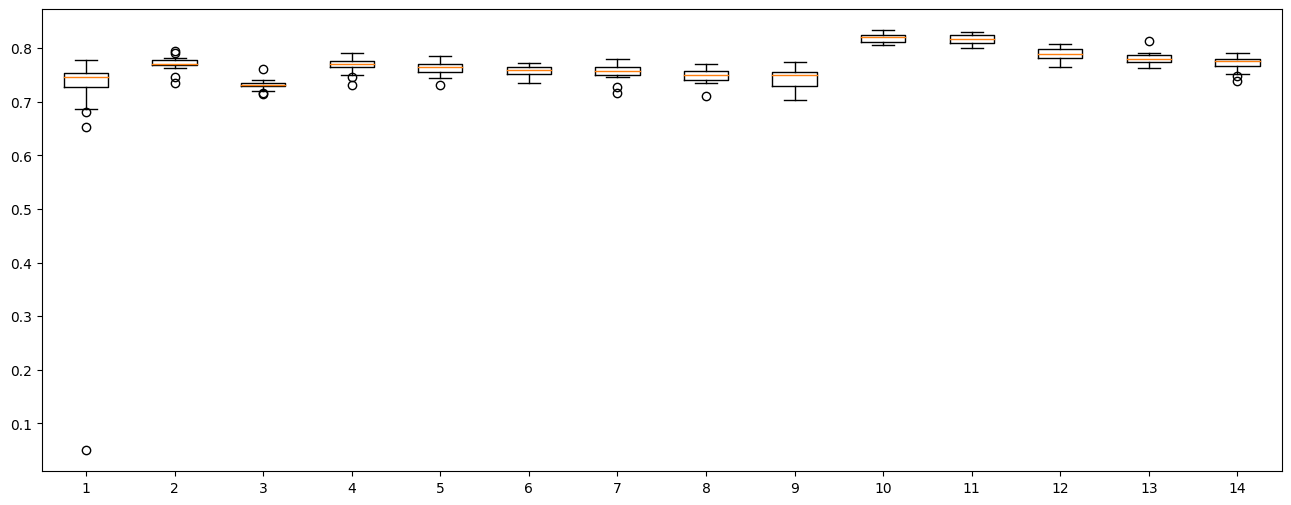

In [11]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)

In [12]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[1])
p_val

0.06111353050197896

In [28]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[2])
p_val

1.1052919952753632e-12

In [29]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[3])
p_val

0.6617018678777085

In [30]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[4])
p_val

0.07961481912299154

In [31]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[5])
p_val

0.0020405845846838753

In [35]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[6])
p_val

0.0012694467227237374

In [36]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[7])
p_val

1.6216691626533597e-05

In [37]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[8])
p_val

9.082242849391101e-06

In [39]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[9])
p_val

2.1216836879530113e-16

In [40]:
t_stat, p_val = stats.ttest_ind(samples[9], samples[10])
p_val

0.5742100831633082

In [41]:
t_stat, p_val = stats.ttest_ind(samples[9], samples[11])
p_val

3.520826913219023e-11

In [42]:
t_stat, p_val = stats.ttest_ind(samples[9], samples[12])
p_val

8.627327372769358e-15

In [43]:
t_stat, p_val = stats.ttest_ind(samples[9], samples[13])
p_val

1.350115358050774e-15

#sampleLeNetBatchAndDropout01 TopResult